In [ ]:


! pip install einops

In [ ]:

import jax
import jax.numpy as jnp

In [ ]:

!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("student/celebA")


In [ ]:

ds = dataset.with_format("jax")

In [ ]:

x = ds['train'][5]['image']

In [ ]:
x.shape

(218, 178, 3)

In [ ]:
# x, _ = next(iter(trainloader))
# import einops
# x = einops.rearrange(x, ' b c h w -> b h w c')[0].numpy()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

y = x / 255.

In [ ]:

y.max(), y.min()

(Array(1., dtype=float32), Array(0., dtype=float32))

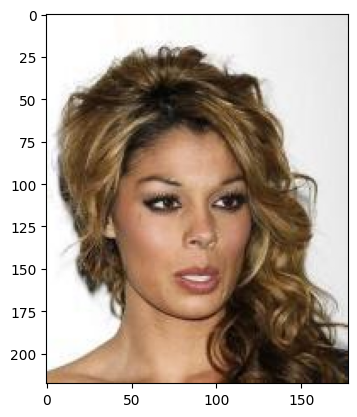

In [ ]:
plt.imshow(y)

In [ ]:
import torch.nn as nn
import torch

def dct(x, norm=None):
    """
    Discrete Cosine Transform, Type II (a.k.a. the DCT)
    For the meaning of the parameter `norm`, see:
    https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html
    :param x: the input signal
    :param norm: the normalization, None or 'ortho'
    :return: the DCT-II of the signal over the last dimension
    """
    x_shape = x.shape
    N = x_shape[-1]
    x = x.contiguous().view(-1, N)

    v = torch.cat([x[:, ::2], x[:, 1::2].flip([1])], dim=1)

    #Vc = torch.fft.rfft(v, 1)
    Vc = torch.view_as_real(torch.fft.fft(v, dim=1))

    k = - torch.arange(N, dtype=x.dtype,
                       device=x.device)[None, :] * np.pi / (2 * N)
    W_r = torch.cos(k)
    W_i = torch.sin(k)

    V = Vc[:, :, 0] * W_r - Vc[:, :, 1] * W_i

    if norm == 'ortho':
        V[:, 0] /= np.sqrt(N) * 2
        V[:, 1:] /= np.sqrt(N / 2) * 2

    V = 2 * V.view(*x_shape)

    return V

In [ ]:

torch_im = torch.tensor(np.array(im))

NameError: name 'np' is not defined

In [ ]:
x = torch_im
x_shape = x.shape
N = x_shape[-1]
x = x.contiguous().view(-1, N)
v = torch.cat([x[:, ::2], x[:, 1::2].flip([1])], dim=1)
print('v', v.shape)
fft = torch.fft.fft(v, dim=1)
print('fft', fft.shape)
Vc = torch.view_as_real(fft)
print('vc', Vc.shape)
k = - torch.arange(N, dtype=x.dtype,
                    device=x.device)[None, :] * np.pi / (2 * N)
W_r = torch.cos(k)
W_i = torch.sin(k)

V = Vc[:, :, 0] * W_r - Vc[:, :, 1] * W_i

V = 2 * V.view(*x_shape)
V

In [ ]:

jax_V - V.numpy()

In [ ]:

import einops

In [ ]:

?jax.scipy.fft

In [ ]:
jnp.flip

In [ ]:

Vc.shape

In [ ]:

jnp.stack([fft.real, fft.imag], -1).shape

In [ ]:
x = torch_im.detach().numpy()


# x (218, 178, 3)
def dct_jax(x):
  x_shape = x.shape
  d = x_shape[-1]
  x = einops.rearrange(x, '... d -> (...) d')
  v = jnp.concatenate([x[:, ::2], jnp.flip(x[:, 1::2], 1)], axis=1)
  fft = jnp.fft.fft(v, axis=1)
  Vc = jnp.stack([fft.real, fft.imag], -1)

  k = - jnp.arange(N,)[None, :] * np.pi / (2 * N)
  W_r = jnp.cos(k)
  W_i = jnp.sin(k)

  V = Vc[:, :, 0] * W_r - Vc[:, :, 1] * W_i

  V = 2 * V.reshape(*x_shape)
  return V

jax_V = V

In [ ]:
torch_dct = dct(torch_im, norm=None)

In [ ]:

x_shape = X.shape
N = x_shape[-1]

X_v = X.contiguous().view(-1, x_shape[-1]) / 2

if norm == 'ortho':
    X_v[:, 0] *= np.sqrt(N) * 2
    X_v[:, 1:] *= np.sqrt(N / 2) * 2

k = torch.arange(x_shape[-1], dtype=X.dtype,
                  device=X.device)[None, :] * np.pi / (2 * N)
W_r = torch.cos(k)
W_i = torch.sin(k)

V_t_r = X_v
V_t_i = torch.cat([X_v[:, :1] * 0, -X_v.flip([1])[:, :-1]], dim=1)

V_r = V_t_r * W_r - V_t_i * W_i
V_i = V_t_r * W_i + V_t_i * W_r

V = torch.cat([V_r.unsqueeze(2), V_i.unsqueeze(2)], dim=2)

#v = torch.fft.irfft(V, 1)
v = torch.fft.irfft(torch.view_as_complex(V), n=V.shape[1], dim=1)
x = v.new_zeros(v.shape)
x[:, ::2] += v[:, :N - (N // 2)]
x[:, 1::2] += v.flip([1])[:, :N // 2]

x.view(*x_shape)

In [ ]:

y = x/255.

In [ ]:

im.shape, im_dct.shape

In [ ]:

im_dct = dct(im.T, norm='ortho').T

In [ ]:

im_dct = dct(im.T, norm='ortho').T


In [ ]:
from jax.scipy.fft import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='orth')
# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

import numpy as np
import matplotlib.pylab as plt
import einops
# read lena RGB image and convert to grayscale

def image_dct(im):
  imF = jax.vmap(dct2, in_axes=-1)(im)
  return einops.rearrange(imF, 'c h w -> h w c')

def image_idct(im):
  imF = jax.vmap(idct2, in_axes=-1)(im)
  return einops.rearrange(imF, 'c h w -> h w c')

down_res = 5
im = x[:,:,:]/255.
imF = image_dct(im)
print('imf', imF.shape)
# down_sample_imF= imF[:down_res, :down_res]

down_sample_imF = imF

rng = jax.random.PRNGKey(5)


freqs_h = np.pi*jnp.linspace(0, x.shape[0]-1, x.shape[0])/x.shape[0]
freqs_w = np.pi*jnp.linspace(0, x.shape[1]-1, x.shape[1])/x.shape[1]
frequencies_squared = freqs_h[:, None, None]**2 + freqs_w[None, :, None]**2


blurr_sample_imF = down_sample_imF*jnp.exp(- frequencies_squared *50)
down_sample_imF= down_sample_imF.at[down_res:, down_res:].set(0)

# noise_shape = down_sample_imF[down_res:, down_res:].shape
# high_freq_noise = down_sample_imF[down_res:, down_res:] + jax.random.normal(rng, noise_shape)
# down_sample_imF= down_sample_imF.at[down_res:, down_res:].set(high_freq_noise)




# down_sample_imF= down_sample_imF.at[:1, :1].set(0.)

# down_sample_imF= imF.at[:down_res, :down_res].set(0.)
# down_sample_imF = jax.image.resize(imF, (down_res,down_res, 3), method='nearest')

im1 = image_idct(blurr_sample_imF)
im2 = image_idct(down_sample_imF)



# check if the reconstructed image is nearly equal to the original image
# print(np.allclose(im, im1))
# True

# plot original and reconstructed images with matplotlib.pylab
plt.figure(figsize=(50,50))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('original image', size=12)
plt.subplot(132), plt.imshow(im1), plt.axis('off'), plt.title('blur', size=12)
plt.subplot(133), plt.imshow(im2), plt.axis('off'), plt.title('downsample', size=12)

plt.show()
